# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

The following code will read the data into a pandas dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, you'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

## Initial data cleaning

In [2]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [3]:
star_wars_cols = star_wars.columns

In [4]:
star_wars = star_wars[ star_wars['RespondentID'].notnull()]
print("Number of rows with invalid RespondentID: {}"
      .format(sum(star_wars['RespondentID'].isnull()))
     )

Number of rows with invalid RespondentID: 0


In [5]:
col_1 = "Have you seen any of the 6 films in the Star Wars franchise?"
col_2 = "Do you consider yourself to be a fan of the Star Wars film franchise?"

yes_no = {"Yes": True, "No":False}
print(star_wars[col_2].unique())
star_wars[col_1] = star_wars[col_1].map(yes_no)
star_wars[col_2] = star_wars[col_2].map(yes_no)

print(star_wars[col_2].unique())

['Yes' nan 'No']
[True nan False]


In [6]:
col_seen = ["Which of the following Star Wars films have you seen? Please select all that apply."
            , "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8" ]

seen_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.NaN: False
}

seen_dict_rename = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1"
    , "Unnamed: 4":"seen_2"
    , "Unnamed: 5":"seen_3"
    , "Unnamed: 6":"seen_4"
    , "Unnamed: 7":"seen_5"
    , "Unnamed: 8":"seen_6"
}

for c in col_seen:
    star_wars[c] = star_wars[c].map(seen_dict)

star_wars = star_wars.rename( columns = seen_dict_rename)


In [7]:
print(star_wars.head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True

In [8]:
rank_cols = star_wars.columns[9:15]

rank_cols_dict = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
}

for c in rank_cols:
    star_wars[c] = star_wars[c].astype(float)
    
star_wars = star_wars.rename(columns=rank_cols_dict)

['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']


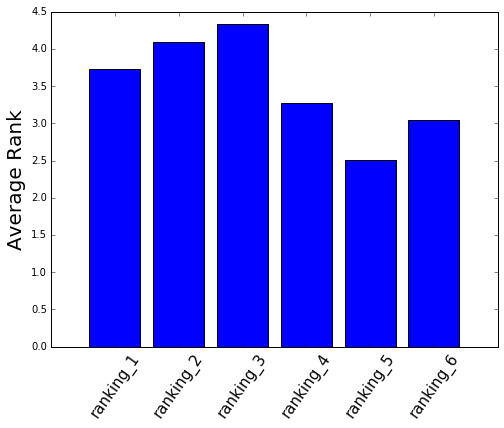

In [20]:
rank_cols = sorted(list(rank_cols_dict.values()))
print(rank_cols)

fig, ax = plt.subplots(figsize=(8,6))

_ = ax.bar(range(len(rank_cols)), star_wars[rank_cols].mean(), align='center')
_ = ax.set_xticks(range(0,6))
_ = ax.set_xticklabels(rank_cols, fontsize=15, rotation = 55)

_ = ax.set_ylabel("Average Rank", fontsize=20)
plt.show()

The above shows the new Star Wars movies (1 through 3) are consistently lower ranked than the old ones (as they should be, they suck). The best ranked movie is *Star Wars: Episode V The Empire Strikes Back*.

## Computing frequency that movies were seen

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']


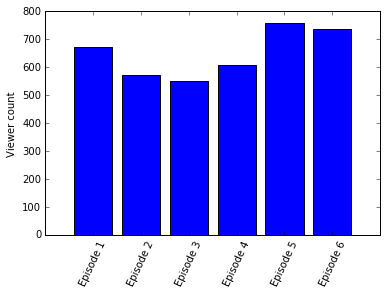

In [43]:
seen_cols = sorted(list(seen_dict_rename.values()))
print(seen_cols)

fig, ax = plt.subplots()

_ = ax.bar( range(0,6), star_wars[seen_cols].sum(), align='center' )

movie_names = ("Episode "+str(x) for x in range(1,7))
ax.set_xticks(range(6))
ax.set_xticklabels( [x for x in movie_names], rotation=65)
ax.set_ylabel("Viewer count")

plt.show()

# Survey results by gender

In [ ]:
males = star_wars[ star_wars["Gender"]=="Male" ]
females = star_wars[ star_wars["Gender"]=="Female" ]

## Results for men:

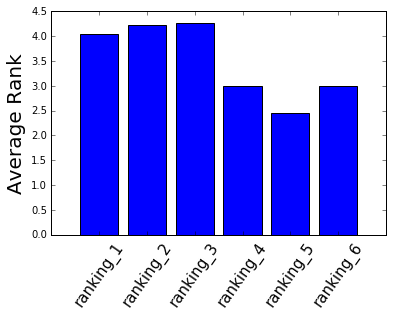

In [46]:
fig, ax = plt.subplots()

_ = ax.bar(range(len(rank_cols)), males[rank_cols].mean(), align='center')
_ = ax.set_xticks(range(0,6))
_ = ax.set_xticklabels(rank_cols, fontsize=15, rotation = 55)

_ = ax.set_ylabel("Average Rank", fontsize=20)
plt.show()

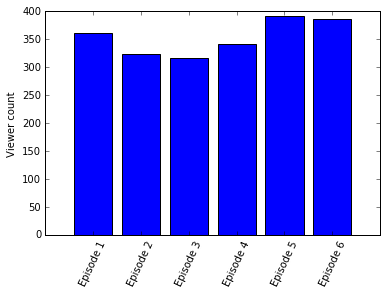

In [48]:
fig, ax = plt.subplots()

_ = ax.bar( range(0,6), males[seen_cols].sum(), align='center' )
movie_names = ("Episode "+str(x) for x in range(1,7))
ax.set_xticks(range(6))
ax.set_xticklabels( [x for x in movie_names], rotation=65)
ax.set_ylabel("Viewer count")

plt.show()

## Results for women:

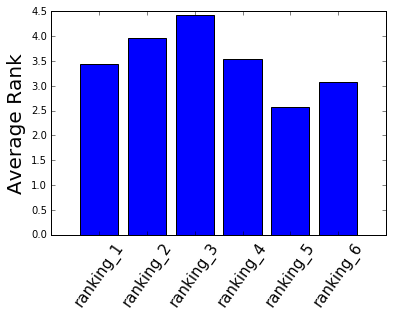

In [49]:
fig, ax = plt.subplots()

_ = ax.bar(range(len(rank_cols)), females[rank_cols].mean(), align='center')
_ = ax.set_xticks(range(0,6))
_ = ax.set_xticklabels(rank_cols, fontsize=15, rotation = 55)

_ = ax.set_ylabel("Average Rank", fontsize=20)
plt.show()

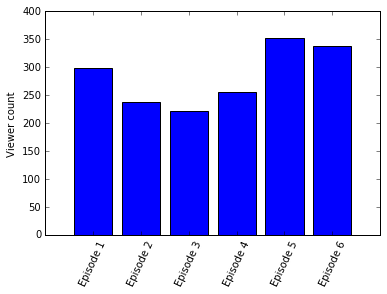

In [50]:
fig, ax = plt.subplots()

_ = ax.bar( range(0,6), females[seen_cols].sum(), align='center' )
movie_names = ("Episode "+str(x) for x in range(1,7))
ax.set_xticks(range(6))
ax.set_xticklabels( [x for x in movie_names], rotation=65)
ax.set_ylabel("Viewer count")

plt.show()

# Suggestions for further analysis

Here are some potential next steps:

- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?
